# 1. Introduction
We compute the value/rating ratio.

We start by loading the necessary packages

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

# 2. Values

Let us load value data

In [2]:
values = pd.read_pickle('../data/value_records_for_ratings_based_predictions.pkl')
values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9610 entries, 5665 to 160599
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   player_id    9610 non-null   int32         
 1   player_name  9610 non-null   object        
 2   player_role  9607 non-null   category      
 3   birth        9610 non-null   datetime64[ns]
 4   height       9610 non-null   float64       
 5   foot         9610 non-null   object        
 6   value        9610 non-null   float64       
 7   league       9610 non-null   object        
 8   value_at     9610 non-null   datetime64[ns]
 9   nat1         9610 non-null   object        
 10  nat2         9610 non-null   object        
dtypes: category(1), datetime64[ns](2), float64(2), int32(1), object(5)
memory usage: 797.8+ KB


Let us simplify a bit players roles using macro roles

In [3]:
macro_role = {'Goalkeeper':'GK', 
              'Centre-Back':'DF',
              'Defensive Midfield': 'MF',
              'Right Winger':'MF',
              'Centre-Forward':'FW',
              'Right-Back':'DF',
              'Attacking Midfield':'MF',
              'Central Midfield':'MF',
              'Left-Back':'DF',
              'Left Winger':'MF',
              'Right Midfield':'MF',
              'Left Midfield':'MF',
              'Second Striker':'FW',
              'Attacking Midfield':'MF'
             }
values["macro_role"] = values["player_role"].apply(lambda x: macro_role.get(x))
values.head()

,player_id,player_name,player_role,birth,height,foot,value,league,value_at,nat1,nat2,macro_role
5665,94308,Marko Dmitrovic,Goalkeeper,1992-01-24,1.94,left,3.60,SPA1,2018-06-30,Serbia,-,GK
5667,139336,Paulo Oliveira,Centre-Back,1992-01-08,1.87,right,2.70,SPA1,2018-06-30,Portugal,-,DF
5671,87469,JosÃ© Ãngel,Left-Back,1989-09-05,1.82,left,2.25,SPA1,2018-06-30,Spain,-,DF
5674,266795,Gonzalo Escalante,Central Midfield,1993-03-27,1.82,right,2.25,SPA1,2018-06-30,Argentina,Italy,MF
5676,153427,BebÃ©,Left Winger,1990-07-12,1.90,right,0.90,SPA1,2018-06-30,Portugal,CapeVerde,MF


For a number of players in the values records there are no ratings statistics. This might be due to the fact that they have not made an appearence in official matches. We filter them out.

In [4]:
missing = pd.read_csv('../data/missing.csv')
len(missing)

41

In [5]:
len(values)

9610

In [6]:
values = values.loc[~values['player_id'].isin(missing['ID']), :]
len(values) 

9556

This number is smaller than 9610 - 41 = 9559 as some players may be in more records, i.e., have value for different years.

In [7]:
values['year'] = values['value_at'].dt.year
values

,player_id,player_name,player_role,birth,height,foot,value,league,value_at,nat1,nat2,macro_role,year
5665,94308,Marko Dmitrovic,Goalkeeper,1992-01-24,1.94,left,3.60,SPA1,2018-06-30,Serbia,-,GK,2018
5667,139336,Paulo Oliveira,Centre-Back,1992-01-08,1.87,right,2.70,SPA1,2018-06-30,Portugal,-,DF,2018
5671,87469,JosÃ© Ãngel,Left-Back,1989-09-05,1.82,left,2.25,SPA1,2018-06-30,Spain,-,DF,2018
5674,266795,Gonzalo Escalante,Central Midfield,1993-03-27,1.82,right,2.25,SPA1,2018-06-30,Argentina,Italy,MF,2018
5676,153427,BebÃ©,Left Winger,1990-07-12,1.90,right,0.90,SPA1,2018-06-30,Portugal,CapeVerde,MF,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160590,138927,Daniel Carvajal,Right-Back,1992-01-11,1.73,right,10.80,SPA1,2014-06-30,Spain,-,DF,2014
160594,31909,Toni Kroos,Central Midfield,1990-01-04,1.83,both,36.00,SPA1,2014-06-30,Germany,-,MF,2014
160597,88103,James RodrÃ­guez,Attacking Midfield,1991-07-12,1.81,left,31.50,SPA1,2014-06-30,Colombia,Spain,MF,2014
160598,8198,Cristiano Ronaldo,Left Winger,1985-02-05,1.87,both,90.00,SPA1,2014-06-30,Portugal,-,MF,2014


# 3. Ratings
Let us now load the ratings values for different ages.

In [8]:
dateparser = lambda x: datetime.strptime(x, '%d.%m.%Y')
ratings_17 = pd.read_csv('../data/ratings_v2_17.txt',names = ['player_id','player_name','birth_date','rating','peak_rating','minutes_played','value_at'], index_col=False,parse_dates=['birth_date','value_at'],date_parser=dateparser)
ratings_18 = pd.read_csv('../data/ratings_v2_18.txt',names = ['player_id','player_name','birth_date','rating','peak_rating','minutes_played','value_at'], index_col=False,parse_dates=['birth_date','value_at'],date_parser=dateparser)
ratings_19 = pd.read_csv('../data/ratings_v2_19.txt',names = ['player_id','player_name','birth_date','rating','peak_rating','minutes_played','value_at'], index_col=False,parse_dates=['birth_date','value_at'],date_parser=dateparser)
ratings_20 = pd.read_csv('../data/ratings_v2_20.txt',names = ['player_id','player_name','birth_date','rating','peak_rating','minutes_played','value_at'], index_col=False,parse_dates=['birth_date','value_at'],date_parser=dateparser)
ratings_21 = pd.read_csv('../data/ratings_v2_21.txt',names = ['player_id','player_name','birth_date','rating','peak_rating','minutes_played','value_at'], index_col=False,parse_dates=['birth_date','value_at'],date_parser=dateparser)
ratings_22 = pd.read_csv('../data/ratings_v2_22.txt',names = ['player_id','player_name','birth_date','rating','peak_rating','minutes_played','value_at'], index_col=False,parse_dates=['birth_date','value_at'],date_parser=dateparser)
ratings_23 = pd.read_csv('../data/ratings_v2_23.txt',names = ['player_id','player_name','birth_date','rating','peak_rating','minutes_played','value_at'], index_col=False,parse_dates=['birth_date','value_at'],date_parser=dateparser)
ratings_24 = pd.read_csv('../data/ratings_v2_24.txt',names = ['player_id','player_name','birth_date','rating','peak_rating','minutes_played','value_at'], index_col=False,parse_dates=['birth_date','value_at'],date_parser=dateparser)
ratings_25 = pd.read_csv('../data/ratings_v2_25.txt',names = ['player_id','player_name','birth_date','rating','peak_rating','minutes_played','value_at'], index_col=False,parse_dates=['birth_date','value_at'],date_parser=dateparser)

In [9]:
ratings_17.head()

,player_id,player_name,birth_date,rating,peak_rating,minutes_played,value_at
0,94308,Marko Dmitrovic,1992-01-24,NaN,NaN,0,1900-01-01
1,139336,Paulo Oliveira,1992-01-08,NaN,NaN,0,1900-01-01
2,87469,Jose Angel,1989-09-05,NaN,NaN,0,1900-01-01
3,266795,Gonzalo Escalante,1993-03-27,NaN,NaN,0,1900-01-01
4,153427,Bebe,1990-07-12,NaN,NaN,0,1900-01-01


From these records let us filter out missing values.

In [10]:
ratings_17 = ratings_17.dropna(subset=['rating', 'peak_rating'])
ratings_18 = ratings_18.dropna(subset=['rating', 'peak_rating'])
ratings_19 = ratings_19.dropna(subset=['rating', 'peak_rating'])
ratings_20 = ratings_20.dropna(subset=['rating', 'peak_rating'])
ratings_21 = ratings_21.dropna(subset=['rating', 'peak_rating'])
ratings_22 = ratings_22.dropna(subset=['rating', 'peak_rating'])
ratings_23 = ratings_23.dropna(subset=['rating', 'peak_rating'])
ratings_24 = ratings_24.dropna(subset=['rating', 'peak_rating'])
ratings_25 = ratings_25.dropna(subset=['rating', 'peak_rating'])

In [11]:
ratings = pd.concat([ratings_17,ratings_18,ratings_19,ratings_20,ratings_21,ratings_22,ratings_23,ratings_24,ratings_25])
ratings['year'] = ratings['value_at'].dt.year
ratings

,player_id,player_name,birth_date,rating,peak_rating,minutes_played,value_at,year
50,26199,Verza,1986-09-29,0.034665,0.141346,1,2003-08-31,2003
58,221321,Joaquin Fernandez,1996-05-31,-0.191357,0.008579,56,2013-04-30,2013
71,251106,Enes Ünal,1997-05-10,-0.142142,0.063741,459,2014-04-30,2014
109,199321,Ruben Blanco,1995-07-25,-0.218329,-0.012563,360,2012-06-30,2012
110,297194,Ivan Villar,1997-07-09,-0.206440,0.005668,91,2014-06-30,2014
...,...,...,...,...,...,...,...,...
3557,39381,Gareth Frank Bale,1989-07-16,0.211451,0.223058,20519,2014-06-30,2014
3558,316264,Martin Odegaard,1998-12-17,0.005114,0.029365,18284,2021-11-08,2021
3559,18922,Karim Benzema,1987-12-19,0.264356,0.270048,16420,2012-11-30,2012
3560,298976,Borja Mayoral Moya,1997-04-05,0.025522,0.034916,10612,2021-11-08,2021


# 4. Value/Rating ratio
Let us now calculate the value/rating ratio. Instead of using market values and ratings, which are dimensionally different, we can use their ranking, that is value_rank/rating_rank. However, this calculation introduces new challenges: how do we rank players? For example, given a moment in time, we could:
- rank all active players at that time
- rank all active players at that time by age group (this would be more fair since age has an impact at least on market values)
- rank all active players at that time by age group and role group (this would be more fair since age and role have an impact at least on market values)

We start by calculating V/R ratio without any particular classification of players. That is, we take all the active players at a given season date and rank them according to value and rating.

Let us create a function that takes values and ratings and returns a table with the V/R rating. By default we rank players in ascending orders of their value, rating and V/R. This means that the players with the smallest V/R ratio are the one characterized by small values (first positions of the value ranking, $1,2,\ldots$) and high rating (low positions of the rating ranking, $\ldots, 99,100$). 
We obtain a V/R in the range of $[1/100,100/1]$, with $100$ being the worst possible V/R value, corresponding to the player with the highest market value (position $100$) and lowest rating (position $1$).

In [12]:
def get_best_players(values:pd.DataFrame, ratings:pd.DataFrame,year:int,ranked_by='rating',ascending=True):
    # First it selects the records for the appropriate year
    v = values.loc[values['year']  == year,['player_id','player_name','macro_role','birth','value']]
    r = ratings.loc[ratings['year']  == year,['player_id','rating','peak_rating','minutes_played']]
    data = r.merge(v,on='player_id', how='inner')
    data['rank_'+ranked_by] = data[ranked_by].rank(pct=True,ascending=ascending,method='average',na_option='bottom')
    data['rank_value'] = data['value'].rank(pct=True,ascending=ascending,method='average',na_option='bottom')
    data['V/R_'+ranked_by] = data.apply(lambda row: row['rank_value']/row['rank_'+ranked_by],axis=1)
    data['rank_V/R'] = data['V/R_'+ranked_by].rank(pct=True,ascending=ascending,method='average',na_option='bottom')
    data = data.sort_values(by=['V/R_'+ranked_by],ascending=ascending)
    return data

In [13]:
p14 = get_best_players(values = values,ratings=ratings,year=2014,ranked_by='peak_rating')
p14

,player_id,rating,peak_rating,minutes_played,player_name,macro_role,birth,value,rank_peak_rating,rank_value,V/R_peak_rating,rank_V/R
3,208244,-0.109065,0.051517,64,Brendan Galloway,DF,1996-03-17,0.045,0.350543,0.005435,0.015504,0.002717
9,291266,-0.087878,0.083296,22,Godfred Donsah,MF,1996-06-07,0.090,0.578804,0.020380,0.035211,0.005435
94,149239,0.016317,0.078019,90,Thomas Vincensini,GK,1993-09-12,0.090,0.538043,0.020380,0.037879,0.008152
26,202886,0.034549,0.162664,10,Ruben Loftus-Cheek,MF,1996-01-23,0.135,0.894022,0.038043,0.042553,0.010870
1,226524,-0.155053,0.011234,121,Morten Thorsby,MF,1996-05-05,0.045,0.125000,0.005435,0.043478,0.013587
...,...,...,...,...,...,...,...,...,...,...,...,...
284,111114,-0.054934,-0.044705,6796,Kevin Long,DF,1990-08-18,0.360,0.013587,0.131793,9.700000,0.989130
197,226006,-0.051209,-0.023170,4204,Emanuel InsÃºa,DF,1991-04-10,1.080,0.027174,0.313859,11.550000,0.991848
219,170321,-0.061063,-0.033932,4218,Paul Dummett,DF,1991-09-26,0.675,0.016304,0.210598,12.916667,0.994565
179,110923,-0.037957,-0.012584,9171,Mattia Perin,GK,1992-11-10,9.000,0.043478,0.811141,18.656250,0.997283


Let us create a new column which states in which portion of the V/R ranking each player, is, that is, top 10, top 20, and so on.

In [14]:
def position(x:float):
    for i in [10,20,30,40,50,60,70,80,90,100]:
        if x <= i/100:
            return 'top'+str(i)
p14['position'] = p14.apply(lambda row: position(row['rank_V/R']),axis=1)
p14

,player_id,rating,peak_rating,minutes_played,player_name,macro_role,birth,value,rank_peak_rating,rank_value,V/R_peak_rating,rank_V/R,position
3,208244,-0.109065,0.051517,64,Brendan Galloway,DF,1996-03-17,0.045,0.350543,0.005435,0.015504,0.002717,top10
9,291266,-0.087878,0.083296,22,Godfred Donsah,MF,1996-06-07,0.090,0.578804,0.020380,0.035211,0.005435,top10
94,149239,0.016317,0.078019,90,Thomas Vincensini,GK,1993-09-12,0.090,0.538043,0.020380,0.037879,0.008152,top10
26,202886,0.034549,0.162664,10,Ruben Loftus-Cheek,MF,1996-01-23,0.135,0.894022,0.038043,0.042553,0.010870,top10
1,226524,-0.155053,0.011234,121,Morten Thorsby,MF,1996-05-05,0.045,0.125000,0.005435,0.043478,0.013587,top10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,111114,-0.054934,-0.044705,6796,Kevin Long,DF,1990-08-18,0.360,0.013587,0.131793,9.700000,0.989130,top100
197,226006,-0.051209,-0.023170,4204,Emanuel InsÃºa,DF,1991-04-10,1.080,0.027174,0.313859,11.550000,0.991848,top100
219,170321,-0.061063,-0.033932,4218,Paul Dummett,DF,1991-09-26,0.675,0.016304,0.210598,12.916667,0.994565,top100
179,110923,-0.037957,-0.012584,9171,Mattia Perin,GK,1992-11-10,9.000,0.043478,0.811141,18.656250,0.997283,top100


We add the value of the players after a given number of seasons and compute the value change. Let us start witht the next season, 2015.

In [15]:
year = 2015
change = p14.loc[:,['player_id','player_name','birth','value','rating','position']].merge(values.loc[values['year']==year,['player_id','player_name','birth','value']],on='player_id', how='inner')
change['value_change'] = change.apply(lambda row:100* (row['value_y']-row['value_x'])/row['value_x'],axis=1)
change

,player_id,player_name_x,birth_x,value_x,rating,position,player_name_y,birth_y,value_y,value_change
0,208244,Brendan Galloway,1996-03-17,0.045,-0.109065,top10,Brendan Galloway,1996-03-17,0.225,400.000000
1,291266,Godfred Donsah,1996-06-07,0.090,-0.087878,top10,Godfred Donsah,1996-06-07,4.950,5400.000000
2,149239,Thomas Vincensini,1993-09-12,0.090,0.016317,top10,Thomas Vincensini,1993-09-12,0.135,50.000000
3,202886,Ruben Loftus-Cheek,1996-01-23,0.135,0.034549,top10,Ruben Loftus-Cheek,1996-01-23,0.450,233.333333
4,226524,Morten Thorsby,1996-05-05,0.045,-0.155053,top10,Morten Thorsby,1996-05-05,0.225,400.000000
...,...,...,...,...,...,...,...,...,...,...
334,99232,Marco D'Alessandro,1991-02-17,1.440,-0.045258,top100,Marco D'Alessandro,1991-02-17,1.800,25.000000
335,226006,Emanuel InsÃºa,1991-04-10,1.080,-0.051209,top100,Emanuel InsÃºa,1991-04-10,1.350,25.000000
336,170321,Paul Dummett,1991-09-26,0.675,-0.061063,top100,Paul Dummett,1991-09-26,2.250,233.333333
337,110923,Mattia Perin,1992-11-10,9.000,-0.037957,top100,Mattia Perin,1992-11-10,13.500,50.000000


<AxesSubplot:xlabel='position', ylabel='value_change'>

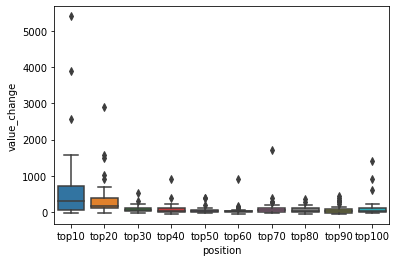

In [16]:
import seaborn as sns
sns.boxplot(x="position", y="value_change",
            data=change)

Let us see in details the statistics of the top 10 and bottom 10 players.

In [17]:
change.loc[change['position']== 'top10',['value_change']].describe()

,value_change
count,33.000000
mean,691.778900
std,1169.743113
min,-20.000000
25%,66.666667
50%,300.000000
75%,733.333333
max,5400.000000


In [18]:
change.loc[change['position']== 'top100',['value_change']].describe()

,value_change
count,29.000000
mean,147.318632
std,310.637260
min,-37.500000
25%,0.000000
50%,30.434783
75%,120.000000
max,1400.000000


Let us see what happens after two seasons

In [22]:
year = 2016
change = p14.loc[:,['player_id','player_name','birth','value','rating','position']].merge(values.loc[values['year']==year,['player_id','player_name','birth','value']],on='player_id', how='inner')
change['value_change'] = change.apply(lambda row:100* (row['value_y']-row['value_x'])/row['value_x'],axis=1)
change

,player_id,player_name_x,birth_x,value_x,rating,position,player_name_y,birth_y,value_y,value_change
0,208244,Brendan Galloway,1996-03-17,0.045,-0.109065,top10,Brendan Galloway,1996-03-17,2.700,5900.000000
1,291266,Godfred Donsah,1996-06-07,0.090,-0.087878,top10,Godfred Donsah,1996-06-07,4.500,4900.000000
2,149239,Thomas Vincensini,1993-09-12,0.090,0.016317,top10,Thomas Vincensini,1993-09-12,0.135,50.000000
3,202886,Ruben Loftus-Cheek,1996-01-23,0.135,0.034549,top10,Ruben Loftus-Cheek,1996-01-23,4.500,3233.333333
4,226524,Morten Thorsby,1996-05-05,0.045,-0.155053,top10,Morten Thorsby,1996-05-05,1.130,2411.111111
...,...,...,...,...,...,...,...,...,...,...
334,129679,Cheick DoukourÃ©,1992-09-11,0.675,-0.051420,top100,Cheick DoukourÃ©,1992-09-11,0.900,33.333333
335,99232,Marco D'Alessandro,1991-02-17,1.440,-0.045258,top100,Marco D'Alessandro,1991-02-17,1.350,-6.250000
336,111114,Kevin Long,1990-08-18,0.360,-0.054934,top100,Kevin Long,1990-08-18,0.315,-12.500000
337,110923,Mattia Perin,1992-11-10,9.000,-0.037957,top100,Mattia Perin,1992-11-10,15.750,75.000000


<AxesSubplot:xlabel='position', ylabel='value_change'>

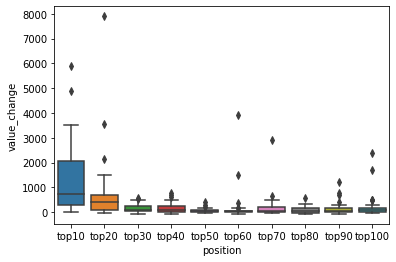

In [23]:
sns.boxplot(x="position", y="value_change",
            data=change)

Again, let us see in details the statistics of top and bottom 10

In [24]:
change.loc[change['position']== 'top10',['value_change']].describe()

,value_change
count,31.000000
mean,1407.831541
std,1547.462707
min,0.000000
25%,300.000000
50%,733.333333
75%,2083.333333
max,5900.000000


In [25]:
change.loc[change['position']== 'top100',['value_change']].describe()

,value_change
count,28.000000
mean,257.792366
std,537.149314
min,-18.750000
25%,16.614907
50%,99.557522
75%,159.523810
max,2400.000000


It seems that the players with a higher V/R ratio have a better chance to see their values increasing.

-----------------------------
## Now we try to group players by age.

In [68]:
age = 20
year = 2014
birth = year - age

In [69]:
r = ratings[age]

In [70]:
v = values.loc[(values['birth']> str(birth)+'-1-1') 
                        & (values['birth'] < str(birth)+'-12-31') 
                        & ( (values['value_at'].dt.year - values['birth'].dt.year) == age),:]
#v = v.loc[v['macro_role'] == "FW",['player_id','player_name','player_role','macro_role','birth','value']]
v = v.loc[:,['player_id','player_name','player_role','macro_role','birth','value']]

In [71]:
data = r.merge(v,on='player_id', how='inner')

In [72]:
data['rank_rating'] = data['rating'].rank(pct=True,ascending=False,method='average',na_option='bottom')

In [73]:
data['rank_value'] = data['value'].rank(pct=True,ascending=False,method='average',na_option='bottom')

In [74]:
data['V/R'] = data.apply(lambda row: row['rank_value']/row['rank_rating'],axis=1)